In [21]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib
# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = """
SELECT * FROM POWER_UNBALANCE
"""
power_curve = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
power_curve = power_curve.sort_values(by='TIMESTAMP')

power_curve

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,TIMESTAMP,UNBALANCE_kW,SOURCE_ZONE
0,2023-11-01 01:00:23.830,-629.99,EOLICO_CSUD
1,2023-11-01 01:00:23.830,-208.45,EOLICO_SUD
2,2023-11-01 01:00:23.830,-781.50,IDRO-NON-PROGRAMMABILE_H_CNOR
3,2023-11-01 01:00:23.830,104.48,IDRO-NON-PROGRAMMABILE_H_CSUD
4,2023-11-01 01:00:23.830,2238.28,IDRO-NON-PROGRAMMABILE_H_NORD
...,...,...,...
6698390,2024-12-02 09:35:42.973,122.02,EOLICO_SICI
6698389,2024-12-02 09:35:42.973,1275.82,EOLICO_CSUD
6698404,2024-12-02 09:35:42.973,529.23,SOLARE_SARD
6698396,2024-12-02 09:35:42.973,703.34,IDRO-NON-PROGRAMMABILE_H24_CNOR


In [22]:
power_curve = power_curve.pivot(index='TIMESTAMP', columns='SOURCE_ZONE', values='UNBALANCE_kW')

# Rename columns for clarity (optional, if needed)
power_curve.columns = [f"UNBALANCE_{col}" for col in power_curve.columns]

# Display the resulting DataFrame
power_curve = power_curve.resample('H').sum()

C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_8928\3983807998.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  power_curve = power_curve.resample('H').sum()


In [23]:
power_curve

,UNBALANCE_EOLICO_CALA,UNBALANCE_EOLICO_CSUD,UNBALANCE_EOLICO_SICI,UNBALANCE_EOLICO_SUD,UNBALANCE_IDRO-NON-PROGRAMMABILE-MACROSUD,UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_CNOR,UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_CSUD,UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_NORD,UNBALANCE_IDRO-NON-PROGRAMMABILE_H_CNOR,UNBALANCE_IDRO-NON-PROGRAMMABILE_H_CSUD,...,UNBALANCE_IDRO-NON-PROGRAMMABILE_MACRONORD,UNBALANCE_IDRO-NON-PROGRAMMABILE_MOD_CNOR,UNBALANCE_IDRO-NON-PROGRAMMABILE_MOD_NORD,UNBALANCE_IDRO-PROGRAMMABILE_NORD,UNBALANCE_SOLARE_CNOR,UNBALANCE_SOLARE_CSUD,UNBALANCE_SOLARE_NORD,UNBALANCE_SOLARE_SARD,UNBALANCE_SOLARE_SICI,UNBALANCE_SOLARE_SUD
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2023-11-01 01:00:00,0.0,-11836.96,0.00,-9885.640,0.00,0.00,0.0,0.00,-34653.04,-2608.72,...,0.00,0.0,0.0,12447.43,0.000,0.00,0.000,0.00,0.00,0.00
2023-11-01 02:00:00,0.0,9075.50,0.00,1052.930,0.00,0.00,0.0,0.00,-30515.39,933.02,...,0.00,0.0,0.0,12130.31,0.000,0.00,0.000,0.00,0.00,0.00
2023-11-01 03:00:00,0.0,9300.76,0.00,13287.240,0.00,0.00,0.0,0.00,-32794.26,-7879.44,...,0.00,0.0,0.0,12297.07,0.000,0.00,0.000,0.00,0.00,0.00
2023-11-01 04:00:00,0.0,9968.71,0.00,14031.350,0.00,0.00,0.0,0.00,-34100.85,6210.08,...,0.00,0.0,0.0,25895.64,0.000,0.00,0.000,0.00,0.00,0.00
2023-11-01 05:00:00,0.0,18647.19,0.00,4583.640,0.00,0.00,0.0,0.00,-36480.18,24022.56,...,0.00,0.0,0.0,-28886.10,0.000,0.00,0.000,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-02 05:00:00,0.0,98579.64,1900.38,23167.169,2978.29,0.00,0.0,-18978.10,3889.71,-887.48,...,-1182.07,0.0,0.0,8908.35,0.000,0.00,5719.800,0.00,0.00,0.00
2024-12-02 06:00:00,0.0,99736.37,-8.39,45245.640,34640.89,27636.98,0.0,-63524.70,7845.85,-1017.60,...,-26628.22,0.0,0.0,-47957.34,0.000,0.00,6148.950,0.00,0.00,0.00
2024-12-02 07:00:00,0.0,13808.59,-4563.67,28892.255,48819.81,42970.80,0.0,389632.67,8548.13,-1000.11,...,414267.54,0.0,0.0,-49991.33,-10572.224,-9363.15,-1410.535,-8127.18,0.00,-54393.57


In [24]:
print(power_curve.columns.tolist())

['UNBALANCE_EOLICO_CALA', 'UNBALANCE_EOLICO_CSUD', 'UNBALANCE_EOLICO_SICI', 'UNBALANCE_EOLICO_SUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE-MACROSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_CNOR', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_CSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_NORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_CNOR', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_CSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_NORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_NORD_NO-ADJ', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MACRONORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MOD_CNOR', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MOD_NORD', 'UNBALANCE_IDRO-PROGRAMMABILE_NORD', 'UNBALANCE_SOLARE_CNOR', 'UNBALANCE_SOLARE_CSUD', 'UNBALANCE_SOLARE_NORD', 'UNBALANCE_SOLARE_SARD', 'UNBALANCE_SOLARE_SICI', 'UNBALANCE_SOLARE_SUD']


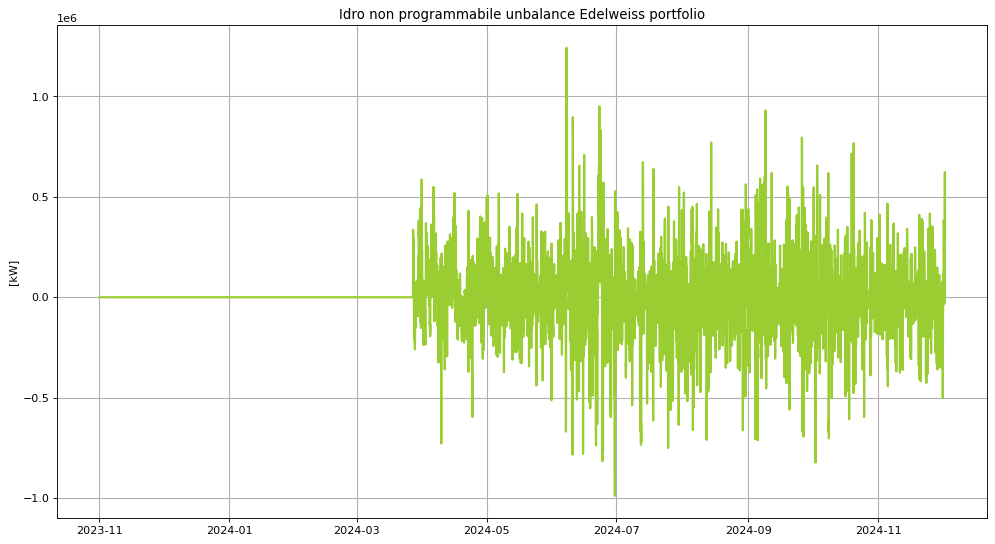

In [25]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(power_curve["UNBALANCE_IDRO-NON-PROGRAMMABILE_MACRONORD"], linewidth=2, color = "yellowgreen") 

ax.set_title("Idro non programmabile unbalance Edelweiss portfolio"); ax.set_ylabel("[kW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

In [26]:
macronord_columns = [col for col in power_curve.columns if "MACRONORD" in col]
print(macronord_columns)

['UNBALANCE_IDRO-NON-PROGRAMMABILE_MACRONORD']


In [27]:
nord_columns = [col for col in power_curve.columns if "NORD" in col]
print(nord_columns)

['UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_NORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_NORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_NORD_NO-ADJ', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MACRONORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MOD_NORD', 'UNBALANCE_IDRO-PROGRAMMABILE_NORD', 'UNBALANCE_SOLARE_NORD']


In [28]:
macrosud_columns = [col for col in power_curve.columns if "MACROSUD" in col]
print(macrosud_columns)

['UNBALANCE_IDRO-NON-PROGRAMMABILE-MACROSUD']


In [29]:
sud_columns = [col for col in power_curve.columns if "SUD" in col]
print(sud_columns)

['UNBALANCE_EOLICO_CSUD', 'UNBALANCE_EOLICO_SUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE-MACROSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_CSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_CSUD', 'UNBALANCE_SOLARE_CSUD', 'UNBALANCE_SOLARE_SUD']


In [30]:
print(power_curve.columns.tolist())

['UNBALANCE_EOLICO_CALA', 'UNBALANCE_EOLICO_CSUD', 'UNBALANCE_EOLICO_SICI', 'UNBALANCE_EOLICO_SUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE-MACROSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_CNOR', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_CSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H24_NORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_CNOR', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_CSUD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_NORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_H_NORD_NO-ADJ', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MACRONORD', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MOD_CNOR', 'UNBALANCE_IDRO-NON-PROGRAMMABILE_MOD_NORD', 'UNBALANCE_IDRO-PROGRAMMABILE_NORD', 'UNBALANCE_SOLARE_CNOR', 'UNBALANCE_SOLARE_CSUD', 'UNBALANCE_SOLARE_NORD', 'UNBALANCE_SOLARE_SARD', 'UNBALANCE_SOLARE_SICI', 'UNBALANCE_SOLARE_SUD']
